In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapfunction as mapf
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
wh_gdgi = pd.read_csv('wh_gd_gi_final.csv')

# <span style="color:red">Observation 1: Switzerland has both the Max World Happiness Score (7.587) and the Min Gender Inequality Score (.04)</span>  

# <span style="color:red">Observation 2: There is not much variance in the score of the top 3 countries</span>

#### Question: What is the min, max and range of Happiness Scores?

In [3]:
print('Min Happiness Score:',round(wh_gdgi['Happiness Score'].min(), 3))
print('Min Happiness Country:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['Happiness Score'] == wh_gdgi['Happiness Score'].min()])
print('Max Happiness Score:',round(wh_gdgi['Happiness Score'].max(), 3))
print('Max Happiness Country:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['Happiness Score'] == wh_gdgi['Happiness Score'].max()])
print('Happiness Score range:', round((wh_gdgi['Happiness Score'].max()- wh_gdgi['Happiness Score'].min()),3))

Min Happiness Score: 2.839
Min Happiness Country:
    Country              Region
122    Togo  Sub-Saharan Africa
Max Happiness Score: 7.587
Max Happiness Country:
         Country          Region
117  Switzerland  Western Europe
Happiness Score range: 4.748


Text(0.5, 1.0, 'Bottom 10 Happiness Scores')

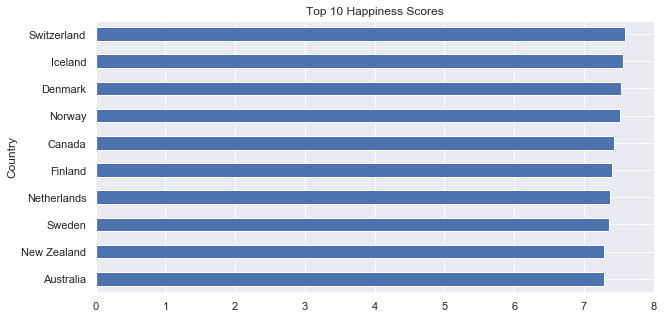

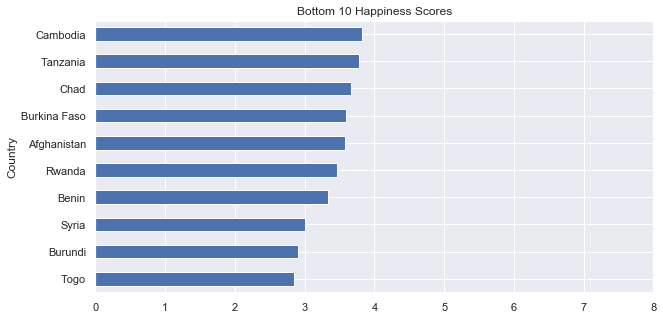

In [4]:
ax = wh_gdgi[['Country','Happiness Score']].sort_values('Happiness Score').tail(10).plot(kind='barh',x='Country',y='Happiness Score',xlim=(0,8), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Top 10 Happiness Scores')

ax = wh_gdgi[['Country','Happiness Score']].sort_values('Happiness Score').head(10).plot(kind='barh',x='Country',y='Happiness Score',xlim=(0,8), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Bottom 10 Happiness Scores')

#### Question: What is the min, max and range of Gender Development Scores?

In [5]:
print('Min Gender Development Score:',round(wh_gdgi['GD 2015'].min(), 3))
print('Min Gender Development Country:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['GD 2015'] == wh_gdgi['GD 2015'].min()])
print('Max Gender Development Score:',round(wh_gdgi['GD 2015'].max(), 3))
print('Max Gender Development Country:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['GD 2015'] == wh_gdgi['GD 2015'].max()])
print('Gender Development Score range:', round((wh_gdgi['GD 2015'].max()- wh_gdgi['GD 2015'].min()),3))

Min Gender Development Score: 0.609
Min Gender Development Country:
       Country         Region
0  Afghanistan  Southern Asia
Max Gender Development Score: 1.032
Max Gender Development Country:
      Country                      Region
37    Estonia  Central and Eastern Europe
70  Lithuania  Central and Eastern Europe
Gender Development Score range: 0.423


Text(0.5, 1.0, 'Bottom 10 Gender Development Scores')

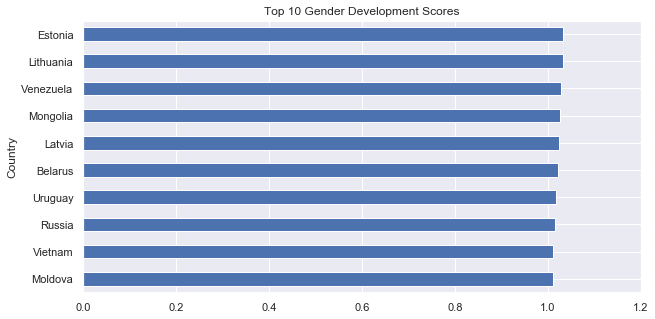

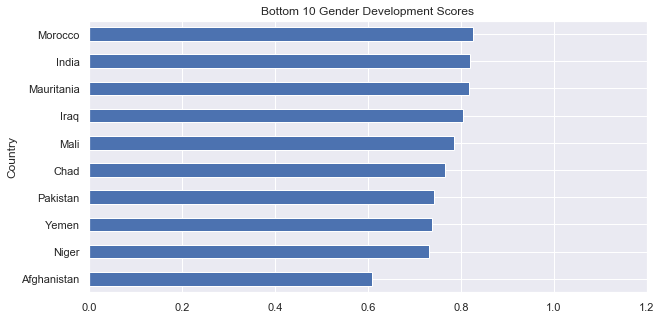

In [6]:
ax = wh_gdgi[['Country','GD 2015']].sort_values('GD 2015').tail(10).plot(kind='barh',x='Country',y='GD 2015',xlim=(0,1.2), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Top 10 Gender Development Scores')

ax = wh_gdgi[['Country','GD 2015']].sort_values('GD 2015').head(10).plot(kind='barh',x='Country',y='GD 2015',xlim=(0,1.2), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Bottom 10 Gender Development Scores')

#### Question: What is the min, max and range of Gender Inequality Scores?

In [7]:
print('Min Gender Inequality Score:',round(wh_gdgi['GI 2015'].min(), 3))
print('Min Gender Inequality Country:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['GI 2015'] == wh_gdgi['GI 2015'].min()])
print('Max Gender Inequality Score:',round(wh_gdgi['GI 2015'].max(), 3))
print('Max Gender Inequality Country:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['GI 2015'] == wh_gdgi['GI 2015'].max()])
print('Gender Inequality Score range:', round((wh_gdgi['GI 2015'].max()- wh_gdgi['GI 2015'].min()),3))

Min Gender Inequality Score: 0.04
Min Gender Inequality Country:
         Country          Region
117  Switzerland  Western Europe
Max Gender Inequality Score: 0.767
Max Gender Inequality Country:
    Country                           Region
135   Yemen  Middle East and Northern Africa
Gender Inequality Score range: 0.727


Text(0.5, 1.0, 'Bottom 10 Gender Inequality Scores (higher scores less favorable)')

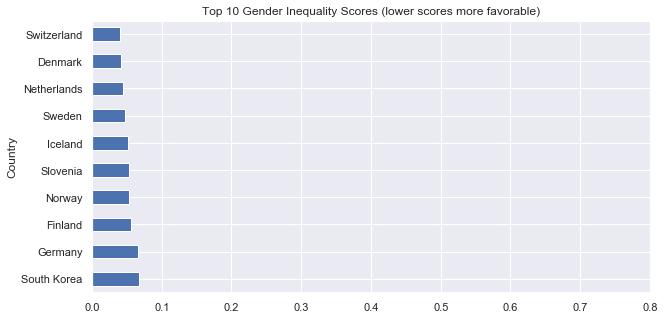

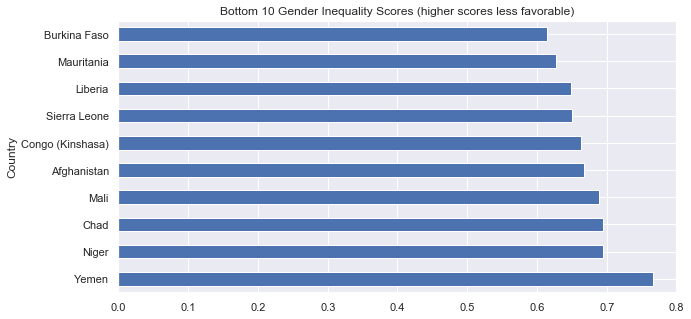

In [8]:
ax = wh_gdgi[['Country','GI 2015']].sort_values('GI 2015',ascending=False).tail(10).plot(kind='barh',x='Country',y='GI 2015',xlim=(0,0.8), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Top 10 Gender Inequality Scores (lower scores more favorable)')

ax = wh_gdgi[['Country','GI 2015']].sort_values('GI 2015',ascending=False).head(10).plot(kind='barh',x='Country',y='GI 2015',xlim=(0,0.8), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Bottom 10 Gender Inequality Scores (higher scores less favorable)')

# <span style="color:red">Observation: Happiness Score has somewhat of a normal distribution, while Gender Development has a left-skewed distribution which means more countries score higher Gender Development Scores. Gender Inequality has a bimodal distribution which means there are two peaks in the distribution</span>

### Question: What's the distribution of each category

In [9]:
hist_happiness = wh_gdgi[['Happiness Score']]
hist_gd = wh_gdgi[['GD 2015']]
hist_gi = wh_gdgi[['GI 2015']]

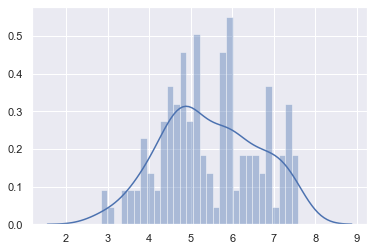

In [10]:
sns.distplot(hist_happiness, bins=30)

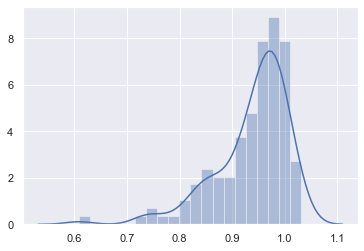

In [11]:
sns.distplot(hist_gd, bins=20)

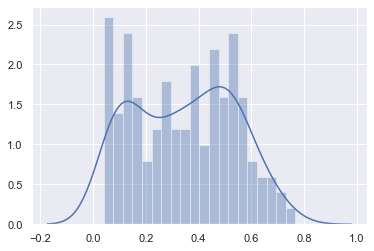

In [12]:
sns.distplot(hist_gi, bins=20)

# <span style="color:red">Observation 1: Although a Western Europe country holds the highest World Happiness Score, Australia and New Zealand region have the highest Happiness Scores on average</span>

# <span style="color:red">Observation 2: Southern Asia and Sub-Saharan Africa have the lowest average World Happiness and Gender Development Scores, as well as the highest average Gender Inequality Scores</span>

# <span style="color:red">Observation 3: Western Countries dominate on average when it comes to World Happiness, as well as having lower Gender Inequality on average</span>

#### Question: What are the average scores by region?

In [13]:
def score_by_region(score):
    print(wh_gdgi[['Region',score]].groupby('Region').mean().sort_values(score, ascending=False))

def graph_by_region(score):
    wh_gdgi[['Region',score]].groupby('Region').mean().sort_values(score).plot(kind='barh', title=score)
    plt.legend().remove()

                                 Happiness Score
Region                                          
Australia and New Zealand               7.285000
North America                           7.273000
Western Europe                          6.739350
Latin America and Caribbean             6.204550
Middle East and Northern Africa         5.512722
Eastern Asia                            5.496250
Southeastern Asia                       5.397143
Central and Eastern Europe              5.315481
Southern Asia                           4.580857
Sub-Saharan Africa                      4.218032


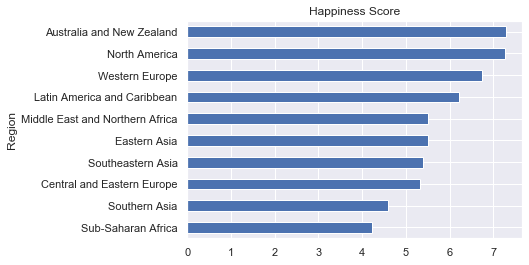

In [14]:
score_by_region('Happiness Score')
graph_by_region('Happiness Score')

                                  GD 2015
Region                                   
North America                    0.988000
Central and Eastern Europe       0.984593
Latin America and Caribbean      0.976650
Western Europe                   0.970700
Australia and New Zealand        0.970500
Eastern Asia                     0.969750
Southeastern Asia                0.962714
Middle East and Northern Africa  0.896667
Sub-Saharan Africa               0.883613
Southern Asia                    0.836429


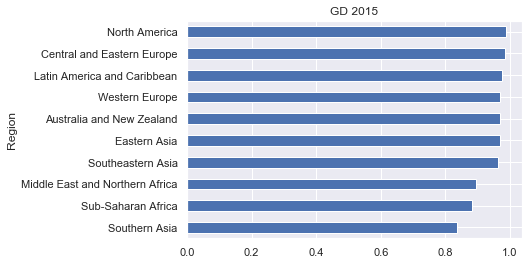

In [15]:
score_by_region('GD 2015')
graph_by_region('GD 2015')

                                  GI 2015
Region                                   
Sub-Saharan Africa               0.560065
Southern Asia                    0.517571
Latin America and Caribbean      0.406750
Middle East and Northern Africa  0.383556
Southeastern Asia                0.374429
Central and Eastern Europe       0.219963
Eastern Asia                     0.156250
North America                    0.150500
Australia and New Zealand        0.139000
Western Europe                   0.084700


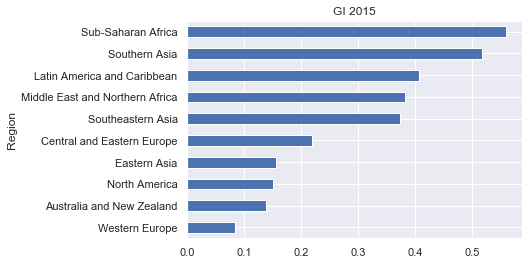

In [16]:
score_by_region('GI 2015')
graph_by_region('GI 2015')

In [17]:
world_2015 = gpd.read_file('world2015/wh_gd_gi.shp')

In [18]:
mapf.show_map(world_2015,
        'happiness_',
        '2015 Happiness Scores',
        'Happiness Score',
        1,
        2.8,
        8.25)

Loading BokehJS ...

In [21]:
mapf.show_map(world_2015,
        'gd_2015',
        '2015 Gender Development Scores',
        'Gender Development',
        1,
        0.8,
        1.05)

Loading BokehJS ...

In [22]:
mapf.show_map(world_2015,
        'gi_2015',
        '2015 Gender Development Scores',
        'Gender Development',
        -1,
        0,
        0.79)

Loading BokehJS ...